In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import random
from scipy import signal
%matplotlib inline

np.random.seed(0)

from math import pi


def generate_rw(N,dt,mean_p,speed,sigma, X_init=None):

    x = np.zeros((N,2))
    v = np.zeros((N,2))
    
    if X_init is not None:
        x[0] = X_init
        
    
    
    angle = np.random.uniform(0,2*np.pi)
    v[0,0] = np.cos(angle)
    v[0,1] = np.sin(angle)
    
    for i in range(N-1):
        
        x[i+1,0]=x[i,0]+ speed[i]*v[i,0]
        x[i+1,1]=x[i,1]+ speed[i]*v[i,1]
        
        
        centre = mean_p[i] - x[i]
        
        revert = np.arctan2(centre[1],centre[0])
        inert = 0.5
        v[i,0] += inert*np.cos(revert)
        v[i,1] += inert*np.sin(revert)
        
        shift = np.random.normal(0,sigma[i])
        
        angle = np.arctan2(v[i,1],v[i,0])
        new_angle = angle + shift
        
        v[i+1,0]=np.cos(new_angle)
        v[i+1,1]=np.sin(new_angle)
        

    return x

# Multiple individuals with nomadic movements

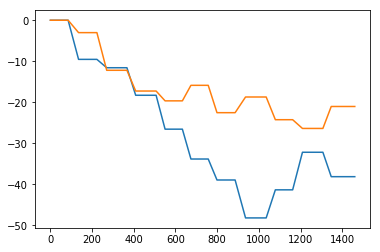

In [2]:
day_steps=4
dt=1.0/day_steps
N=int(365*day_steps+1) # run for .5 years

sigma=np.zeros((N,1))

sigma[:,0]=0.5

speed = 0.1*np.ones((N,1))
T = np.arange(N)/day_steps

mean_p = np.zeros((N,2))

velocities = np.zeros((N,2))

i=0
sw=0
while i<N:
    istart = i + random.randint(80,100)
    
    
    duration = random.randint(40,50)
    istop = istart + duration
    i = istop
    if istop>N:
        break
    
    angle = np.random.uniform(0,2*np.pi)
    

    velocities[istart:istop,0]=0.2*np.cos(angle)
    velocities[istart:istop,1]=0.2*np.sin(angle)


    
    speed[istart:istop]=0.2
    sigma[istart:istop]=0.1

    

for i in range(1,N):
    mean_p[i] = mean_p[i-1] + velocities[i-1]
    
plt.plot(mean_p[:,0])
plt.plot(mean_p[:,1])
plt.show()


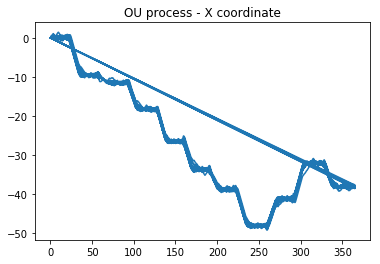

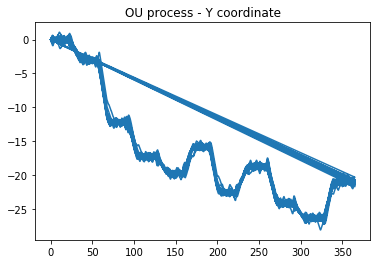

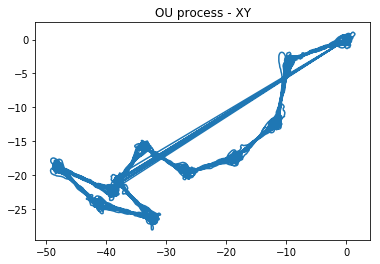

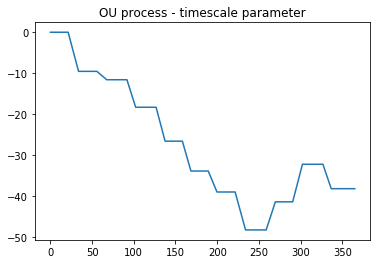

In [3]:


collars = 15
X = np.zeros((0,2))
allT = np.zeros((0,))
ids = np.zeros((0,))
for c in range(collars):
    
    
    X_init=mean_p[0]
    x=generate_rw(N,dt,mean_p,speed,sigma, X_init)
    #x[1:] = np.diff(x,axis=0)
    X = np.vstack((X,x))
    allT = np.hstack((allT,T))
    ids = np.hstack((ids,np.full_like(T,c)))

plt.plot(allT,X[::1,0])
plt.title('OU process - X coordinate')
plt.show()

plt.plot(allT,X[::1,1])
plt.title('OU process - Y coordinate')
plt.show()

plt.plot(X[::1,0],X[::1,1])
#plt.xlim(-1,5)
#plt.ylim(-3,3)

plt.title('OU process - XY')
plt.show()

plt.plot(T,mean_p[:,0])
plt.title('OU process - timescale parameter')
plt.show()
dataset = pd.DataFrame({'Animal':ids,
                         'Date':pd.to_datetime(allT, unit='D', origin=pd.Timestamp('2018-01-01')),
                         'Time':pd.to_datetime(pd.to_datetime(allT, unit='D', origin=pd.Timestamp('2018-01-01')), format='%H:%M').time,
                         'Latitude':X[::,0],
                         'Longitude':X[::,1]})#,'Lengthscale':revert[::,1]**-1,'MeanX':mean_p[:,0],'MeanY':mean_p[:,1]})

dataset.to_csv('../data/switch.csv')


In [4]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

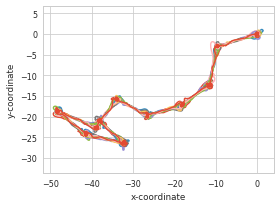

In [5]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%Hh')


gridsize = (1, 1)
fig = plt.figure(figsize=(4, 3))
ax1 = plt.subplot2grid(gridsize, (0, 0))




Ty=T/365.


for i in np.unique(ids):
    plt.plot(X[i==ids,0],X[i==ids,1])



ax1.set_xlabel('x-coordinate')
ax1.set_ylabel('y-coordinate')
ax1.axis('equal')



plt.tight_layout(h_pad=2,w_pad=3)





plt.savefig('../figures/switch_data.png', dpi=300, bbox_inches = "tight")

In [37]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

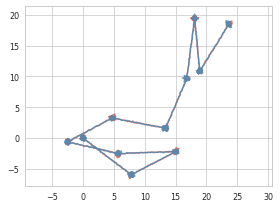

In [45]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%Hh')


gridsize = (1, 1)
fig = plt.figure(figsize=(4, 3))
ax1 = plt.subplot2grid(gridsize, (0, 0))



for i in np.unique(ids)[:2]:
    ax1.plot(X[i==ids,0],X[i==ids,1],alpha=0.75)
    


ax1.axis('equal')



plt.tight_layout(h_pad=2,w_pad=3)




plt.savefig('../figures/switch_data.png', dpi=300, bbox_inches = "tight")

In [40]:
ids

array([ 0.,  0.,  0., ..., 14., 14., 14.])

## Validation of inferred parameters

In [124]:
lengths = np.load('../data/ls_onset.npy')
amps = np.load('../data/amps_onset.npy')
Z = np.load('../data/Z_onset.npy')

In [125]:
lengths = np.mean(lengths,axis=0)
amps = np.mean(amps,axis=0)

amps=2.0*amps/lengths

l_full = np.interp(T,Z[:,0],lengths[:,0])
a_full = np.interp(T,Z[:,0],amps[:,0])

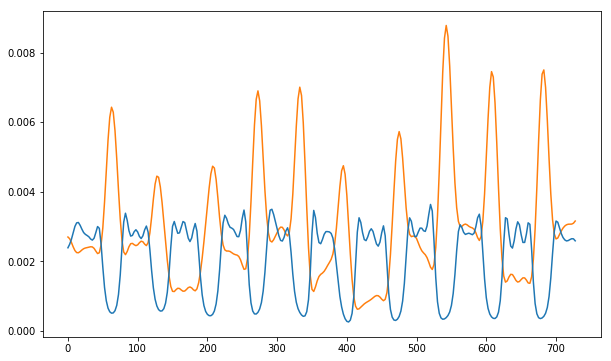

In [130]:

gridsize = (2, 1)
plt.figure(figsize=(10, 6))




plt.plot(Z,lengths/50000,c='C1', linewidth=1.5)
    

plt.plot(Z,amps,c='C0',linewidth=1.5)

#plt.plot(allT[ids==0],X[ids==0,0]/1000)


In [164]:
day_steps=2
dt=1.0/day_steps
N=int(365*2*day_steps) # run for .5 years



T = np.arange(N)/day_steps

sigma=np.zeros((N,2))
sigma[:,1]=a_full*1000
sigma[:,0]=a_full*1000

revert= np.zeros((N,2))
revert[:,1]=0.000001#1.0/l_full
revert[:,0]=0.000001#1.0/l_full
mean_p = np.zeros((N,2))


In [165]:
X_init=mean_p[0]
x=generateOU(N,dt,mean_p,revert,sigma, X_init)




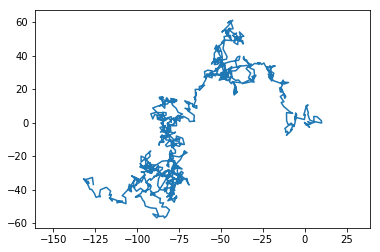

In [166]:
plt.plot(x[:,0],x[:,1])
plt.axis('equal')
plt.show()

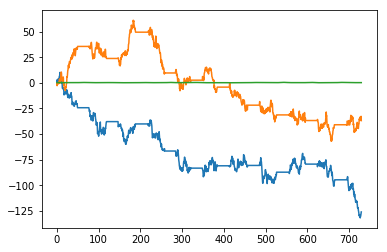

In [167]:
plt.plot(T,x[:,0])
plt.plot(T,x[:,1])
plt.plot(T,0.001*l_full)
plt.show()

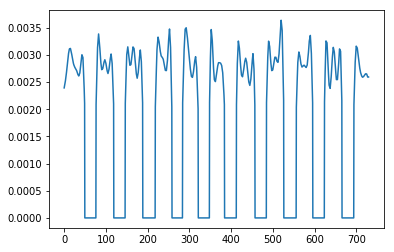

In [159]:
plt.plot(T,a_full)
#plt.plot(T,l_full/1000)

In [158]:
a_full[a_full<0.0020]=0.000000

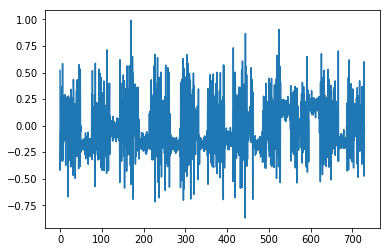

In [174]:
plt.plot(allT[ids==0][:-1],np.diff(X[ids==0,0]))


In [ ]:
day_steps=2
dt=1.0/day_steps
N=int(365*2*day_steps) # run for .5 years

sigma=np.zeros((N,1))

sigma[:,0]=1#0.001

revert= 1*np.ones((N,2))
T = np.arange(N)/day_steps

mean_p = np.zeros((N,2))

velocities = np.zeros((N,2))

i=0
sw=0
while i<N:
    istart = i + random.randint(80,100)
    
    
    if sw%2==0:
        angle = np.random.uniform(0,2*np.pi)
        duration =random.randint(40,50)
        istop = istart + duration
        velocities[istart:istop,0]=0.2*np.cos(angle)
        velocities[istart:istop,1]=0.2*np.sin(angle)
        
    else:
        istop = istart + duration
        velocities[istart:istop,0]=-0.2*np.cos(angle)
        velocities[istart:istop,1]=-0.2*np.sin(angle)
    sw+=1
    
    
    sigma[istart:istop]=0.2
    i = istop
    

for i in range(1,N):
    mean_p[i] = mean_p[i-1] + velocities[i-1]
    
plt.plot(mean_p[:,0])
plt.plot(mean_p[:,1])
plt.show()